# 單詞嵌入(word embeddings)

![word-embeddings](http://techblog.gumgum.com/media/288/download/word-emb-pipeline-1024x321.png?v=1)

將向量與單詞關聯的另一種流行且強大的方式是使用密集的“單詞向量(word vectors)”，也稱為“單詞嵌入(word embeddings)”。

雖然通過one-hot編碼獲得的向量是二元，稀疏（大部分由零構成）而且維度會變成非常的高（與詞彙表中單詞的數量相同, 也就是如果有1000個不重覆的單詞, 那每個單詞就會變成1000維的向量），然而“單詞嵌入(word embeddings)”卻可以用低維度的浮點向量
（即“密集”向量，而不是稀疏向量）來表示相同的一個單詞。

與透過one-hot編碼獲得的單詞向量不同地方在於“單詞嵌入(word embeddings)”是從數據中學習得來的。通常在處理非常大的詞彙表時，我們通常會看到256維，512維或1024維的“單詞嵌入(word embeddings)”層。

另一方面，one-hot編碼單詞通常導致20,000維或更高維的向量（假設我們需要處理 20,000個詞彙的詞彙表的任務）。因此從某種角度來說，“單詞嵌入(word embeddings)”可以用將更多信息包裝到更少的維度中。



![word embeddings vs. one hot encoding](https://s3.amazonaws.com/book.keras.io/img/ch6/word_embeddings.png)

這裡有兩種獲得“單詞嵌入(word embeddings)”的方法：

*把“單詞嵌入(word embeddings)”與我們關心的主要任務模型（例如文檔分類或情感預測）一起設計在模型的結構中一起訓練共同學習。 在這樣的設計裡，我們將從隨機詞向量開始，然後學習我們的詞向量(word vector)，就像學習神經網絡的權重一樣。

*加載預訓練好的“單詞嵌入(word embeddings)”到訓練模型中，這種嵌入(embeddings)是使用不同於我們正在嘗試解決的機器學習任務的機器學習任務所預先計算與訓練出來的。
這些被稱為“預先訓練的詞嵌入”。

我們來看看兩者。

## 利用嵌入層(embedding layer)來學習單詞嵌入(word embeddings)

將單詞與密集向量相關聯的最簡單方法是選擇一種隨機向量(vector at random)。這種方法的問題是，這樣的嵌入空間(embedding space)將沒有什麼結構的關聯性：例如，"accurate"和"exact"這兩個字可能會是完全不同的嵌入(embeddings)，深度神經網絡很難理解這樣一個嘈雜的，非結構化的嵌入空間。

為了得到更抽象一點：不同詞向量(word vectors)之間的幾何關係應該反映這些詞之間的語義關係。單詞嵌入(word embeddings)意味著將人類語言映射到幾何空間(geometric space)。例如，在一個合理的嵌入空間中，我們期望
同義詞被嵌入到相似的單詞向量中，並且通常我們會期望任意兩個之間的幾何距離（例如L2距離）
單詞向量與相關單詞的語義距離相關（單詞意味著非常不同的事物將嵌入到點中
彼此相距很遠，而相關的詞會更接近）。即使超出了距離，我們可能會希望在嵌入空間中__方向__
是有意義的。

在現實世界的詞嵌入空間中，有意義的幾何變換的常見例子是“性別向量(gender vectors)”和“複數向量(plural vector)”。例如，通過給“國王(king)”向量添加“女性(female)”向量，會獲得“女王(queen)”向量。通過添加“複數(plural)矢量”，可以獲得“國王們(kings)”。
字嵌入空間通常具有數千個這樣的可解釋和潛在有用的向量。

![word2vec](http://ox5l2b8f4.bkt.clouddn.com/images/%E8%AF%8D%E5%90%91%E9%87%8F%E6%80%BB%E7%BB%93%E7%AC%94%E8%AE%B0%EF%BC%88%E7%AE%80%E6%B4%81%E7%89%88%EF%BC%89/3.jpg)

是否有一些“完美”的單詞嵌入空間可以完美地映射人類語言，並可用於任何自然語言處理
任務？ 或許吧，但無論如何，我們還沒有訓練出這樣類型的東西出來。另外，不同的語言有著不同的結構，因為語言是特定文化和特定背景的反映。

那麼從實務的角度來說，到底什麼樣的詞嵌入空間才算的上是一個好的詞嵌入？ 它很大程度上取決於我們想要進行的任務：一個“電影評論情感分析模型”的的詞嵌入空間可能與“法律文件分類模型”的詞嵌入空間看起來有很大不同，因為某些語義關係的重要性會因任務或要解決的問題而有所差異。

為每個新任務學習一個新的詞嵌入空間是合理的。值得慶幸的是，反向傳播(backpropagation)使得這件事非常地簡單，而Keras讓這件事再更容易了, 因為keras讓單詞嵌入(word embeddings)的訓練變成學習神經圖層的權重。

In [1]:
import warnings
warnings.filterwarnings('ignore')

import keras
keras.__version__

'2.14.0'

In [2]:
from keras.layers import Embedding

# 嵌入層( Embedding layer)的構建至少需要兩個參數：
# 可能的符標(token)的數量，這裡是 1000(1 + maximum word index),
# 和嵌入(embedding)的維度，這裡是 64。

embedding_layer = Embedding(1000, 64)

嵌入層(embedding layer)最好的理解是: 將整數索引（代表特定單詞）映射到密集向量的字典物件中。輸入整數，它查找一個內部字典，並返回相關的向量。

嵌入層以`(samples, sequence_length)`的整數2D張量作為輸入，其中每筆資料是一個整數序列（sequence of integers)。它也可以嵌入不同長度的序列，例如，我們可以將這些序列輸入到可能具有形狀（32,10）（一批32個長度10）或（64,15）的批次之上的嵌入層中（一批64個長度15）。雖然批處理中的所有序列必須具有相同的長度（因為我們需要將它們打包為單個張量），所以比其他序列短的序列應該用零填充，並且應該截斷較長的序列。

這個嵌入層會返回一個形狀為`（samples，sequence_length，embedding_dimensionality）`的3D浮點張量。然後這樣的3D張量由RNN層或1D卷積層處理。

當我們實例化一個`Embedding`層的時候，它的權重（它的內部符標向量字典）最初是隨機的，就像任何其他神經層。在訓練過程中，這些單詞向量將通過反向傳播逐漸調整，將嵌入空間構建成一些下游模式可以利用的東西。一旦經過充分訓練，我們的嵌入空間將顯示出許多結構(一種專門針對我們正在訓練模型的特定問題結構)。

讓我們將這個想法應用於IMDB電影評論情緒預測任務。讓我們快速準備數據。我們會將電影評論限制在最常見的10,000個單詞中，並且僅在20個單詞後刪減評論。我們的網絡將簡單地學習10,000個單詞中的每一個的8維嵌入，將輸入整數序列（2D整數張量）轉化為嵌入序列（3D浮點張量），將張量平坦化為2D，並訓練一個單獨的`Dense`層來進行分類。

In [22]:
from keras.datasets import imdb
from keras import preprocessing

# 要考慮作為特徵的單詞數
max_features = 10000

# 在此單詞數量之後剪切文本
maxlen = 20

# 將數據加載為整數列表
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# Get the word-to-index mapping
word_index = imdb.get_word_index()

# Create a reverse mapping from index to word
index_to_word = {index: word for word, index in word_index.items()}

# Decode the first sequence in x_train
decoded_sequence = [index_to_word.get(index, "<UNKNOWN>") for index in x_train[10]]

# Print the decoded sequence
print(decoded_sequence)


['the', 'clear', 'fact', 'entertaining', 'there', 'life', 'back', 'br', 'is', 'safely', 'show', 'of', 'performance', 'stars', 'br', 'actors', 'film', 'him', 'many', 'should', 'movie', 'reasons', 'to', 'and', 'reading', 'and', 'are', 'in', 'of', 'scenes', 'and', 'and', 'of', 'safely', 'out', 'compared', 'not', 'boss', 'yes', 'to', 'sentiment', 'show', 'its', 'disappointed', 'fact', 'raw', 'to', 'it', 'justice', 'by', 'br', 'of', 'where', 'clear', 'fact', 'many', 'your', 'way', 'and', 'with', 'city', 'nice', 'are', 'is', 'along', 'wrong', 'not', 'as', 'it', 'way', 'she', 'but', 'this', 'anything', 'up', "haven't", 'been', 'by', 'who', 'of', 'choices', 'br', 'of', 'you', 'to', 'as', 'this', "i'd", 'it', 'and', 'who', 'of', 'shot', "you'll", 'to', 'love', 'for', 'updated', 'of', 'you', 'it', 'is', 'sequels', 'of', 'little', 'quest', 'are', 'seen', 'watched', 'front', 'chemistry', 'to', 'simply', 'alive', 'of', 'chris', 'being', 'it', 'is', 'say', 'easy', 'and', 'cry', 'in', 'chemistry', 'b

In [29]:
# 這將我們的整數列表變成一個2D整個張量 (samples, maxlen)
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen) # 不夠長的補'0', 太長的裁剪掉
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen) # 不夠長的補'0', 太長的裁剪掉

In [30]:
print(x_train.shape)
print(x_test.shape)

(25000, 20)
(25000, 20)


In [12]:
from keras.models import Sequential
from keras.layers import Flatten, Dense

model = Sequential()

# 我們為嵌入層指定最大輸入長度，以便稍後將嵌入式輸入平坦化
# 參數：
#      符標(token)的數量，這裡是 1000
#      嵌入(embedding)的維度，這裡是 8
model.add(Embedding(10000, 8, input_length=maxlen))

# 在嵌入層之後，我們的張量形狀轉換成為 `(samples, maxlen, 8)`.

# 我們將3D嵌入張量變成2D張量形狀 `(samples, maxlen * 8)`
model.add(Flatten())

# 我們添加一個二元分類層
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['acc'])
model.summary()

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 20, 8)             80000     
                                                                 
 flatten (Flatten)           (None, 160)               0         
                                                                 
 dense (Dense)               (None, 1)                 161       
                                                                 
Total params: 80161 (313.13 KB)
Trainable params: 80161 (313.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
625/625 [==============================] - 2s 3ms/step - loss: 0.6591 - acc: 0.6302 - val_loss: 0.5845 - val_acc: 0.7164
Epoch 2/10
625/625 [==============================] - 2s 3ms/step - loss: 0.4902 - acc: 0.7874 - val_loss: 0.5012 - val_acc: 0.7462
Epoch 3/10
625/625

我們的驗證準確性達到了76％，考慮到我們只查看每篇評論的前20個單詞，這樣的結果算是相當不錯的了。但要注意的是，僅僅將嵌入的序列扁平展開並在頂部訓練單個`Dense`神經層會產生出一種模型，該模型將單獨處理輸入序列中的每個單詞，而不考慮單詞間關係和語句結構。在嵌入序列之上添加循環圖層(recurrent layer)或一維卷積圖層(1D convolutional layer)來學習將每個序列作為一個整體考慮在內的特徵會更好。

## 使用預先訓練的詞嵌入(pre-trained word embeddings)

有時候，我們只有很少的訓練數據可供使用，因此無法單獨使用我們的數據來學習適合特定任務的詞彙嵌入。那該怎麼辦？

我們可以加載預先訓練好的詞嵌入(pre-trained word embeddings)。在自然語言處理中使用預先訓練的單詞嵌入背後的原理與在圖像分類中使用預先訓練的模型非常相似：我們沒有足夠的數據來自己學習真正強大的模型，但我們需要相當通用的特徵，即常見的視覺特徵或語義特徵。在這種情況下，重覆使用在不同問題上學習到的特徵是有意義的。

一般都會使用詞語出現（word occurrency)統計量來計算這種詞嵌入，但也有人用神經網絡來訓練詞嵌入。 最著名和成功的詞嵌入方案之一：2013年由Mikolov在谷歌開發的Word2Vec算法。

我們可以使用Keras幾種己經預先訓練好字詞嵌入模型，並在載入到Keras`Embedding`層開始使用。 Word2Vec就是其中之一。另一個流行的詞嵌入是2014年由斯坦福大學研究人員開發的名為“GloVe”的詞嵌入。它是一種基於對詞共現統計矩陣進行因式分解的嵌入技術。它的開發者從Kikipedia或Common Crawl數據獲得的數百萬英文符標產出預先訓練的詞嵌入。

讓我們來看看如何開始在Keras模型中使用GloVe嵌入。對於Word2Vec嵌入或任何可以下載的其他單詞嵌入數據庫，同樣的方法當然是有效的。

## 從原始文本到單詞嵌入(word embeddings)

我們將使用類似於我們剛剛練習的模型-將句子透過嵌入層的轉換成向量序列，將它們壓扁打平並在頂部訓練一個`Dense`層來進行分類。但是這一次我們會使用預先訓練的詞嵌入來完成它，而不是使用Keras中打包的預標記IMDB數據，我們將從頭開始下載原始文本數據。

### 下載IMDB數據

首先，前往`http://ai.stanford.edu/~amaas/data/sentiment/`並下載原始IMDB數據集（如果URL不再有效，只需去Google"IMDB dataset"）。解壓縮它。

現在讓我們將各個訓練用的評論放到一個字符串列表中，每個評論一個字符串，然後把評論標籤(positive / negative)放入一個`labels`列表中：

In [33]:
import os

imdb_dir = 'dataset/aclImdb' # IMDB解壓後的路徑
train_dir = os.path.join(imdb_dir, 'train') # 訓練資料的路徑

labels = []
texts = []

# 迭代檔案目錄來產生訓練資料
for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname),encoding='utf8')
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

In [35]:
print(len(labels))
print(len(texts))

25000
25000


### 對文本數據進行標記(tokenize)

讓我們將我們收集的文本進行向量化，並準備一個訓練和驗證的分割。因為預先訓練的詞嵌入對於只有很少的訓練數據可用的問題特別有用（否則，針對特定任務所訓練的詞嵌入表現可能會優於它們），我們將添加以下內容：我們將訓練數據限制在前200樣本。因此，我們將在學習僅僅200個例子後，對電影評論進行分類。

In [37]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

maxlen = 100  # 每一筆評論我們將裁減成100個字
training_samples = 200  # 我們將使用200個樣本進行訓練
validation_samples = 10000  # 我們用10000個樣本來進行驗證
max_words = 10000  # 我們只考慮數據集中前10,000個單詞

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)


In [50]:
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)


Found 88582 unique tokens.


In [52]:
labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

Shape of data tensor: (25000, 100)
Shape of label tensor: (25000,)


In [54]:
indices = np.arange(data.shape[0])
np.random.shuffle(indices)

In [56]:
# 將數據分成訓練集和驗證集

# 但首先，進行數據順序洗牌
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

### 下載GloVe單詞嵌入(word embeddings)

前往`https://nlp.stanford.edu/projects/glove/`（你可以在這裡了解更多關於GloVe算法的資訊）。它是一個名為`glove.6B.zip`的822MB zip文件，包含400,000個字的100維嵌入向量。解壓縮它。

### 單詞嵌入(word embeddings)預處理

讓我們解析解壓後的文件（它是一個`txt`文件）來構建一個索引映射詞（作為字符串）到它們的向量表示（作為數字向量）。

In [61]:
glove_dir = 'dataSet/glove.6B/' # GloVe解壓後的路徑

embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'), encoding='utf8')

In [66]:
glove_dir = 'dataSet/glove.6B/' # GloVe解壓後的路徑

embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'), encoding='utf8')

for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


現在讓我們建立一個嵌入矩陣，我們將能夠加載進到一個Keras的`Embedding`層。它必須是一個numpy的2D矩陣`(max_words, embedding_dim)`，其中每個條目`i`包含我們引用詞索引（在標記化期間構建）中索引'i'的單詞的嵌入_dim維向量。請注意，索引'0'不應該代表任何單詞或標記 - 它是一個佔位符。

In [69]:
embedding_dim = 100 # 代表每一個單詞會用一個100維的向量來表示

embedding_matrix = np.zeros((max_words, embedding_dim))
embedding_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [70]:
for word, i in word_index.items():
    print(word, i)
    break

the 1


In [71]:
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # 在嵌入索引中找不到的詞的向量裡的值將全是零。
            embedding_matrix[i] = embedding_vector

In [72]:
embedding_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.038194  , -0.24487001,  0.72812003, ..., -0.1459    ,
         0.82779998,  0.27061999],
       [-0.071953  ,  0.23127   ,  0.023731  , ..., -0.71894997,
         0.86894   ,  0.19539   ],
       ...,
       [ 0.13787   , -0.17727   , -0.62436002, ...,  0.35506001,
         0.33443999,  0.14436001],
       [-0.88968998,  0.55208999, -0.50498998, ..., -0.54351002,
        -0.21874   ,  0.51186001],
       [-0.17381001, -0.037609  ,  0.068837  , ..., -0.097167  ,
         1.08840001,  0.22676   ]])

### 定義一個模型

In [74]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 100)          1000000   
                                                                 
 flatten_1 (Flatten)         (None, 10000)             0         
                                                                 
 dense_1 (Dense)             (None, 32)                320032    
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1320065 (5.04 MB)
Trainable params: 1320065 (5.04 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 將GloVe嵌入加載到模型中

嵌入層具有單一權重矩陣：2D浮點數矩陣，其中每個條目“i”是與索引“i”相關聯的單詞向量。讓我們將我們準備好的GloVe矩陣加載到我們的模型中的`Embedding`層：

In [75]:
model.layers[0].set_weights([embedding_matrix]) # 載入嵌入層權重矩陣
model.layers[0].trainable = False # 設定這個嵌入層不可以被訓練

我們凍結嵌入層（我們將它的`trainable`屬性設置為`False`）： 模型訓練的過程中不應該更新己經預先訓練好的部分，以避免忘記已經知道的部分。

### 訓練和評估

In [76]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))
model.save_weights('pre_trained_glove_model.h5')

Epoch 1/10
7/7 [==============================] - 7s 980ms/step - loss: 1.9401 - acc: 0.5000 - val_loss: 0.6928 - val_acc: 0.5499
Epoch 2/10
7/7 [==============================] - 1s 123ms/step - loss: 0.4798 - acc: 0.7500 - val_loss: 0.8624 - val_acc: 0.5047
Epoch 3/10
7/7 [==============================] - 1s 132ms/step - loss: 0.3465 - acc: 0.8400 - val_loss: 0.8605 - val_acc: 0.5083
Epoch 4/10
7/7 [==============================] - 1s 124ms/step - loss: 0.3058 - acc: 0.8700 - val_loss: 1.4391 - val_acc: 0.5007
Epoch 5/10
7/7 [==============================] - 1s 132ms/step - loss: 0.2444 - acc: 0.8850 - val_loss: 0.7165 - val_acc: 0.5820
Epoch 6/10
7/7 [==============================] - 1s 136ms/step - loss: 0.1211 - acc: 0.9850 - val_loss: 1.6204 - val_acc: 0.5014
Epoch 7/10
7/7 [==============================] - 1s 184ms/step - loss: 0.1529 - acc: 0.9400 - val_loss: 0.8196 - val_acc: 0.5562
Epoch 8/10
7/7 [==============================] - 1s 137ms/step - loss: 0.1061 - acc: 0.99

讓我們繪製不同訓練週期的表現：

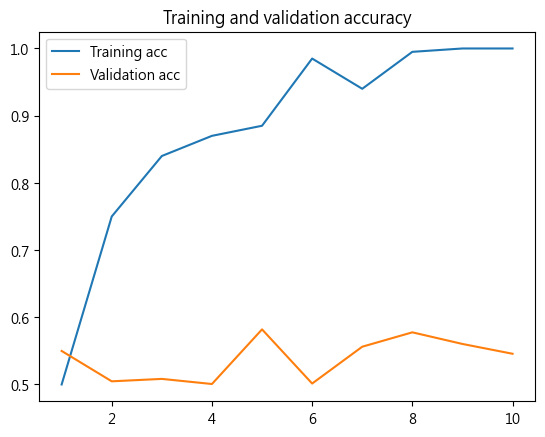

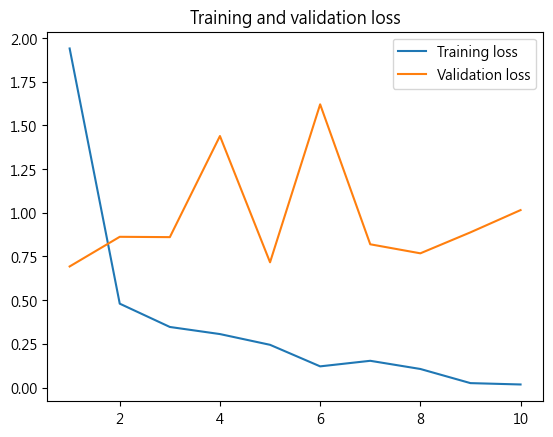

In [77]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

毫不意外的是，由於訓練樣本很少，這個模型很快就開始過度擬合。由於相同的原因，驗證準確度也有很大的差距。

請注意，每個人看到的結果可能會有所不同：由於我們的培訓樣本數量非常少，因此性能高度依賴於我們挑選的那200個樣本，因為我們隨機挑選了它們。

我們還可以嘗試訓練相同的模型，而不加載預先訓練的詞嵌入並且不凍結嵌入層。在這種情況下，我們將學習特定嵌入，當有大量數據可用時，它通常比預先訓練的字詞嵌入更強大。但在我們的案例中，我們只有200個培訓樣本。讓我們試試看：

In [15]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_3 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________
Train on 200 samples, validate on 10000 samples
Epoch 1/10
200/200 [==============================] - 2s 8ms/step - loss: 0.6952 - acc: 0.4400 - val_loss: 0.6949 - val_acc: 0.5157
Epoch 2/10
200/200 [==============================] - 1s 6ms/step - loss: 0.5022 - a

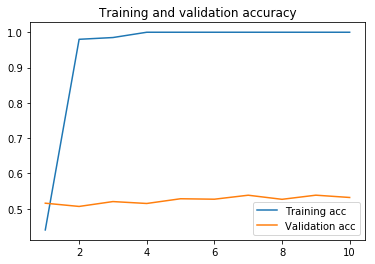

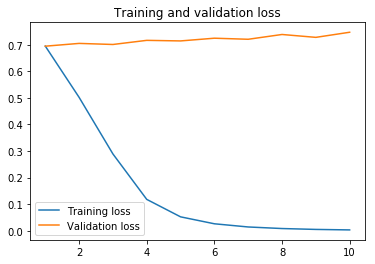

In [16]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

在這個例子中，預先訓練的詞嵌入確實勝過了聯合學習的詞嵌入。如果我們增加訓練樣本的數量，那麼情形很快就會改變。

最後，讓我們在測試數據上評估模型。首先，我們需要標記測試數據：

In [17]:
test_dir = os.path.join(imdb_dir, 'test') # 測試資料的路徑

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(test_dir, label_type)
    for fname in sorted(os.listdir(dir_name)):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname), encoding='utf8')
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

sequences = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences, maxlen=maxlen)
y_test = np.asarray(labels)

我們來加載並評估第一個模型：

In [18]:
model.load_weights('pre_trained_glove_model.h5')
model.evaluate(x_test, y_test)

25000/25000 [==============================] - 3s 105us/step


[3.108985914062932, 0.50156]

我們得到了50.156%的測試準確性(跟用猜的準確性也差不多)。它證明要使用少量訓練樣本來訓練一個好的模型是很困難的！

### 參考: 
* [fchollet: deep-learning-with-python-notebooks (原文)](https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master/6.1-using-word-embeddings.ipynb)
* [Keras官網](http://keras.io/)

MIT License

Copyright (c) 2017 François Chollet

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.